In [1]:
import glob
import numpy as np

In [38]:
def streamflow(dbc,meta): #function to obtain time series of gauged streamflow. 
    #meta is a numerical selector for where meta data ends and measurements of streamflow in the text file begins.
    #dbc is drainage basin code
    y = []
    with open(f'streamz__{dbc}.txt','r') as f:
        for x in f:
            y.append(x)
    y = np.asarray(y)
    print(dbc)
    print('number of lines in text file',y.shape)

    streamflows = y[meta:] #gets rid of meta data, empirically derived

    ## removes tabs, splits words into chunks
    z = []
    for idx,x in enumerate(streamflows):
        y = x.split('\t')
        z.append(y)
    z = np.asarray(z)


    #creates table with labels
    a = np.expand_dims(np.asarray(['Gov Ent','Gage ID','Acq Date','cubic ft/s','unknown']),0)
    b = np.vstack((a,z))
    print(b[1])
    print(b[-1])
    # b = b[:-5] #gets rid of dates we don't want
    # print(b[1],'\n',b[-1])

    #takes column 4 only (discharge) and replaces numbers that aren't integers with dummy number.
    cfs = b[1:,3]
    d = np.empty((0))
    empty_count = 0
    for x in cfs:
        try:
            d = np.append(d,int(x))
        except:
            empty_count+=1
            d = np.append(d,-12345678)
    print(f"empty count: \t {empty_count}\n")
    return d


### calling the streamflow function for these four basin codes.
x = ['br','co','ct','ms']

#initalizes empty array of length 2617.
flows = np.empty((0,2617))

for idx,i in enumerate(x):
    if (idx==0):
        sf = streamflow(i,30)
        
        #adds basin streamflow time series to list of time series (there will be four here each of length 2617)
        flows = np.vstack((flows,sf.reshape(1,-1)))
    elif idx == 1:
        sf = streamflow(i,29)
        flows = np.vstack((flows,sf.reshape(1,-1)))
    else:
        sf = streamflow(i,31)
        flows = np.vstack((flows,sf.reshape(1,-1)))
    # #grabs date column        
    # dte = b[1:,2]

    # ##turns cubic feet per second to tensor for training with larsonet.
    # cfs0 = torch.from_numpy(np.float32(cfs)).unsqueeze(1).unsqueeze(1).unsqueeze(1)
    # torch.save(cfs0,'ms_cfs.pt')
    # np.save('ms_dte.npy',dte)

br
number of lines in text file (2647,)
['USGS' '10039500' '2015-01-01' '125' 'A:e\n']
['USGS' '10039500' '2022-03-01' '132' 'P:e\n']
empty count: 	 257

co
number of lines in text file (2646,)
['USGS' '09429600' '2015-01-01' '340' 'A\n']
['USGS' '09429600' '2022-03-01' '377' 'A\n']
empty count: 	 0

ct
number of lines in text file (2648,)
['USGS' '01193050' '2015-01-01' '33400' 'A\n']
['USGS' '01193050' '2022-03-01' '' '']
empty count: 	 15

ms
number of lines in text file (2648,)
['USGS' '07374000' '2015-01-01' '345000' 'A\n']
['USGS' '07374000' '2022-03-01' '704000' 'P']
empty count: 	 1



In [3]:
flows.shape

(4, 2617)

In [26]:
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "DejaVu Serif"
plt.rcParams["font.size"] = 20
plt.rcParams['figure.dpi'] = 600
plt.rcParams['axes.linewidth'] = 2
plt.rcParams["font.weight"] = "bold"

In [35]:
import matplotlib.gridspec as gridspec

times = np.arange(np.datetime64('2015-01-01'),
                  np.datetime64('2022-03-02'), np.timedelta64(1, 'D'))
# plt.figure(figsize=(15,5))
# for i in flows:
#     j = np.where(i<0,np.nan,i)
#     k = np.nanmean(j)
#     l = np.nanstd(j)
#     j = (j-k)/l
#     # plt.figure()
#     plt.plot(times,j)
# plt.xticks(rotation=45);

fig,ax = plt.subplots(1,1,figsize=(17,17))
plt.xlim([-5,12])
plt.ylim([0,1000])
for i in flows:
    j = np.where(i<0,np.nan,i)
    k = np.nanmean(j)
    l = np.nanstd(j)
    j = (j-k)/l
    plt.hist(j,bins=50,histtype='step',linewidth=4)

plt.legend(['Bear River','Colorado','Connecticut','Mississippi'],loc='upper left',frameon=False)
# plt.xlabel('z-score of basin streamflow')

# xy = (-.5,940)
# plt.annotate('histograms \nz-scored hydrographs', xy=xy, xycoords='data',
#             xytext=xy, textcoords='data',
#              horizontalalignment='center'
#             )

# plt.annotate('histograms of \nz-scored \nstreamflow \nmeasurements', xy=(0,800), xycoords='data',
#              xytext=(.5,700), textcoords='data',
#              arrowprops=dict(facecolor='black',shrink=0.05),
#              horizontalalignment='left',verticalalignment='top',
#             )
# plt.annotate('', xy=(1,500), xycoords='data',
#              xytext=(1.5,600), textcoords='data',
#              arrowprops=dict(facecolor='black',shrink=0.05),
#              horizontalalignment='left',verticalalignment='top',
#             )

# xy = (6.5,960)
# plt.annotate('z-scored hydrographs', xy=xy, xycoords='data',
#             xytext=xy, textcoords='data',
#             )



bounds = np.array([0.4, 0.15, 0.10, 0.705])
colors = ['tab:blue','tab:orange','tab:green','tab:red']
for idx,i in enumerate(flows):
    j = np.where(i<0,np.nan,i)
    k = np.nanmean(j)
    l = np.nanstd(j)
    j = (j-k)/l
    plt.axes(bounds + (idx+1)*np.array([.10,0,0,0]))
    plt.xticks([])
    if idx != 0:
        plt.yticks([])
    plt.plot(np.flip(j),np.flip(times),colors[idx])
    plt.gca().invert_yaxis()

# fig = plt.figure(figsize=(20,10))
# gs = gridspec.GridSpec(1,5,width_ratios=[1,.1,.1,.1,.1])

# ax0 = fig.add_subplot(gs[0, 0])
# for i in flows:
#     j = np.where(i<0,np.nan,i)
#     k = np.nanmean(j)
#     l = np.nanstd(j)
#     j = (j-k)/l
#     plt.hist(j,bins=50)
# # plt.title('Bear River',fontsize=fontsize,fontweight='bold')
# # plt.ylabel('Surface \nFlow',rotation=0, labelpad=50,fontsize=fontsize,fontweight='bold'); plt.xlabel(''); 
# # plt.xticks(fontsize=fontsize); plt.yticks(fontsize=fontsize)

# ax1 = fig.add_subplot(gs[0, 1])
# plt.plot(np.flip(j),np.flip(times),colors[0])
# plt.xticks([])
# # plt.ylabel('Subsurface \nFlow',rotation=0, labelpad=50,fontsize=fontsize,fontweight='bold'); plt.xlabel(''); 
# # plt.xticks(fontsize=fontsize); plt.yticks(fontsize=fontsize)

# ax2 = fig.add_subplot(gs[0, 2])
# plt.plot(np.flip(j),np.flip(times),colors[1])
# plt.xticks([])
# plt.yticks([])
# # plt.title('Colorado',fontsize=fontsize,fontweight='bold')
# # plt.xticks(fontsize=fontsize); plt.yticks(fontsize=fontsize)

# ax3 = fig.add_subplot(gs[0, 3])
# plt.plot(j,times)
# plt.xticks([])
# plt.yticks([])


# ax4 = fig.add_subplot(gs[0, 4])
# plt.plot(j,times)
# plt.xticks([])
# plt.yticks([])

# # plt.xticks(fontsize=fontsize); plt.yticks(fontsize=fontsize)


# # cbar = plt.colorbar(plt7,cax=plt.subplot(gs[2,1:3]),orientation='horizontal')
# # cbar.ax.set_title('kg/$\mathregular{m^2}$',fontsize=fontsize,y=-4,fontweight='bold')
# # cbar.ax.tick_params(labelsize=fontsize) 

# plt.tight_layout()
# # plt.suptitle('yo',y=.91,x=.47,fontsize=24)
plt.savefig('../files_for_paper/fig3.png',bbox_inches='tight')

In [235]:
import itertools
from functools import partial

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from cycler import cycler


def filled_hist(ax, edges, values, bottoms=None, orientation='v',
                **kwargs):
    """
    Draw a histogram as a stepped patch.

    Parameters
    ----------
    ax : Axes
        The axes to plot to

    edges : array
        A length n+1 array giving the left edges of each bin and the
        right edge of the last bin.

    values : array
        A length n array of bin counts or values

    bottoms : float or array, optional
        A length n array of the bottom of the bars.  If None, zero is used.

    orientation : {'v', 'h'}
       Orientation of the histogram.  'v' (default) has
       the bars increasing in the positive y-direction.

    **kwargs
        Extra keyword arguments are passed through to `.fill_between`.

    Returns
    -------
    ret : PolyCollection
        Artist added to the Axes
    """
    # print(orientation)
    if orientation not in 'hv':
        raise ValueError("orientation must be in {{'h', 'v'}} "
                         "not {o}".format(o=orientation))

    kwargs.setdefault('step', 'post')
    kwargs.setdefault('alpha', 0.7)
    edges = np.asarray(edges)
    values = np.asarray(values)
    if len(edges) - 1 != len(values):
        raise ValueError('Must provide one more bin edge than value not: '
                         'len(edges): {lb} len(values): {lv}'.format(
                             lb=len(edges), lv=len(values)))

    if bottoms is None:
        bottoms = 0
    bottoms = np.broadcast_to(bottoms, values.shape)

    values = np.append(values, values[-1])
    bottoms = np.append(bottoms, bottoms[-1])
    if orientation == 'h':
        return ax.fill_betweenx(edges, values, bottoms,
                                **kwargs)
    elif orientation == 'v':
        return ax.fill_between(edges, values, bottoms,
                               **kwargs)
    else:
        raise AssertionError("you should never be here")


def stack_hist(ax, stacked_data, sty_cycle, bottoms=None,
               hist_func=None, labels=None,
               plot_func=None, plot_kwargs=None):
    """
    Parameters
    ----------
    ax : axes.Axes
        The axes to add artists too

    stacked_data : array or Mapping
        A (M, N) shaped array.  The first dimension will be iterated over to
        compute histograms row-wise

    sty_cycle : Cycler or operable of dict
        Style to apply to each set

    bottoms : array, default: 0
        The initial positions of the bottoms.

    hist_func : callable, optional
        Must have signature `bin_vals, bin_edges = f(data)`.
        `bin_edges` expected to be one longer than `bin_vals`

    labels : list of str, optional
        The label for each set.

        If not given and stacked data is an array defaults to 'default set {n}'

        If *stacked_data* is a mapping, and *labels* is None, default to the
        keys.

        If *stacked_data* is a mapping and *labels* is given then only the
        columns listed will be plotted.

    plot_func : callable, optional
        Function to call to draw the histogram must have signature:

          ret = plot_func(ax, edges, top, bottoms=bottoms,
                          label=label, **kwargs)

    plot_kwargs : dict, optional
        Any extra keyword arguments to pass through to the plotting function.
        This will be the same for all calls to the plotting function and will
        override the values in *sty_cycle*.

    Returns
    -------
    arts : dict
        Dictionary of artists keyed on their labels
    """
    # deal with default binning function
    if hist_func is None:
        hist_func = np.histogram

    # deal with default plotting function
    if plot_func is None:
        plot_func = filled_hist

    # deal with default
    if plot_kwargs is None:
        plot_kwargs = {}
    # print(plot_kwargs)
    try:
        l_keys = stacked_data.keys()
        label_data = True
        if labels is None:
            labels = l_keys

    except AttributeError:
        label_data = False
        if labels is None:
            labels = itertools.repeat(None)

    if label_data:
        loop_iter = enumerate((stacked_data[lab], lab, s)
                              for lab, s in zip(labels, sty_cycle))
    else:
        loop_iter = enumerate(zip(stacked_data, labels, sty_cycle))

    arts = {}
    for j, (data, label, sty) in loop_iter:
        if label is None:
            label = 'dflt set {n}'.format(n=j)
        label = sty.pop('label', label)
        vals, edges = hist_func(data)
        if bottoms is None:
            bottoms = np.zeros_like(vals)
        top = bottoms + vals
        # print(sty)
        sty.update(plot_kwargs)
        # print(sty)
        ret = plot_func(ax, edges, top, bottoms=bottoms,
                        label=label, **sty)
        bottoms = top
        arts[label] = ret
    ax.legend(fontsize=10)
    return arts


# set up histogram function to fixed bins
edges = np.linspace(-3, 3, 20, endpoint=True)
hist_func = partial(np.histogram, bins=edges)

# set up style cycles
color_cycle = cycler(facecolor=plt.rcParams['axes.prop_cycle'][:4])
label_cycle = cycler(label=['set {n}'.format(n=n) for n in range(4)])
hatch_cycle = cycler(hatch=['/', '*', '+', '|'])

# Fixing random state for reproducibility
np.random.seed(19680801)

stack_data = np.random.randn(4, 12250)
dict_data = dict(zip((c['label'] for c in label_cycle), stack_data))

Text(0, 0.5, 'x')

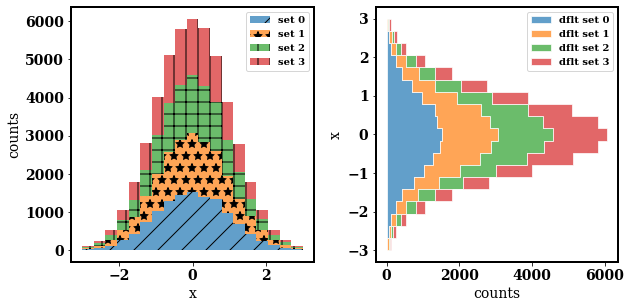

In [236]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4.5), tight_layout=True)
arts = stack_hist(ax1, stack_data, color_cycle + label_cycle + hatch_cycle,
                  hist_func=hist_func);

arts = stack_hist(ax2, stack_data, color_cycle,
                  hist_func=hist_func,
                  plot_kwargs=dict(edgecolor='w', orientation='h'));
ax1.set_ylabel('counts')
ax1.set_xlabel('x')
ax2.set_xlabel('counts')
ax2.set_ylabel('x')

In [148]:
bounds = np.array([0.4, 0.2, 0.15, 0.68])

for idx,i in enumerate(range(3)):
    print(idx)
    bounds2 = bounds + idx * np.array([.15,0,0,0])
    print(bounds2)

0
[0.4  0.2  0.15 0.68]
1
[0.55 0.2  0.15 0.68]
2
[0.7  0.2  0.15 0.68]


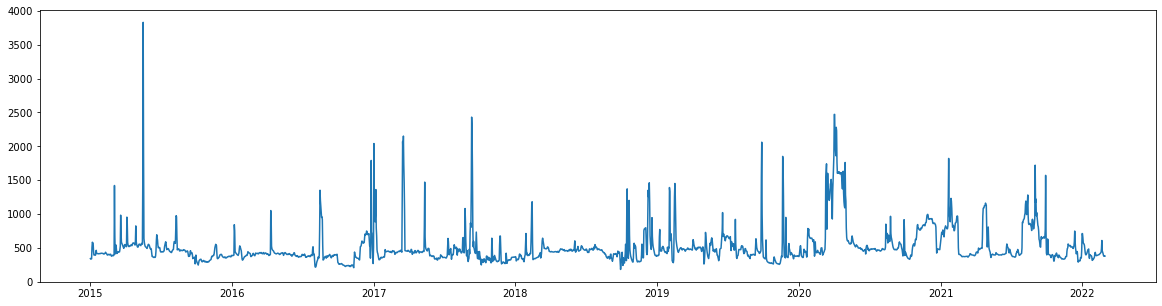

In [79]:
plt.figure(figsize=(20,5))
plt.plot(times,np.where(flows[1]<0,np.nan,flows[1]))

In [26]:
times[-1]

numpy.datetime64('2022-02-28')